# 1 - Introduction to Pandas [45 min]

### Learning objectives:

- Reading and writing data

- Understading and formatting pandas data types

- Working with text data
    
- Working with timeseries data

- Indexing

- Grouping

- Plotting

    

## Dataset

We have some data from an [Amazon Product](http://jmcauley.ucsd.edu/data/amazon/) scrape by [Julian McAuley](http://cseweb.ucsd.edu/~jmcauley/). If you use this data please cite Julian!

    reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
    asin - ID of the product, e.g. 0000013714
    reviewerName - name of the reviewer
    helpful - helpfulness rating of the review, e.g. 2/3
    reviewText - text of the review
    overall - rating of the product
    summary - summary of the review
    unixReviewTime - time of the review (unix time)
    reviewTime - time of the review (raw)

## Import pandas

In [1]:
import pandas as pd
print("Pandas version: {}".format(pd.__version__))

# Edit some default display options
pd.options.display.max_rows = 6
pd.options.display.max_columns = 8
pd.options.display.width = 100

Pandas version: 0.18.1


## Reading and writing data

In [2]:
!gzcat data/reviews/reviews_Clothing_Shoes_and_Jewelry_5.json.gz | head -2

{"reviewerID": "A1KLRMWW2FWPL4", "asin": "0000031887", "reviewerName": "Amazon Customer \"cameramom\"", "helpful": [0, 0], "reviewText": "This is a great tutu and at a really great price. It doesn't look cheap at all. I'm so glad I looked on Amazon and found such an affordable tutu that isn't made poorly. A++", "overall": 5.0, "summary": "Great tutu-  not cheaply made", "unixReviewTime": 1297468800, "reviewTime": "02 12, 2011"}
{"reviewerID": "A2G5TCU2WDFZ65", "asin": "0000031887", "reviewerName": "Amazon Customer", "helpful": [0, 0], "reviewText": "I bought this for my 4 yr old daughter for dance class, she wore it today for the first time and the teacher thought it was adorable. I bought this to go with a light blue long sleeve leotard and was happy the colors matched up great. Price was very good too since some of these go for over $15.00 dollars.", "overall": 5.0, "summary": "Very Cute!!", "unixReviewTime": 1358553600, "reviewTime": "01 19, 2013"}
gzcat: error writing to output: Br

Oph! This is JSON Lines not JSON! Let's load it into lines

In [3]:
import gzip
review_lines = gzip.open('data/reviews/reviews_Clothing_Shoes_and_Jewelry_5.json.gz', 'rt').readlines()
len(review_lines)

278677

Now we have something, but it's a lot of lines. So we load it into a `DataFrame`, an object that is the data hacker's go to for manipulating structured data. 

Unfortunately, its not as straight forward as `pd.read_json`, since first we have to turn all those JSON strings into Python objects, so let's turn each into a dict and then build a `DataFrame`

In [4]:
import json
df = pd.DataFrame(list(map(json.loads, review_lines)))

In [5]:
df

,asin,helpful,overall,reviewText,...,reviewerID,reviewerName,summary,unixReviewTime
0,0000031887,"[0, 0]",5.0,This is a great tutu and at a really great pri...,...,A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800
1,0000031887,"[0, 0]",5.0,I bought this for my 4 yr old daughter for dan...,...,A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600
2,0000031887,"[0, 0]",5.0,What can I say... my daughters have it in oran...,...,A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600
...,...,...,...,...,...,...,...,...,...
278674,B00KKXCJQU,"[1, 1]",5.0,These are very nice packing cubes and the 18 x...,...,A1UQBFCERIP7VJ,Margaret Picky,"Convenient, lightweight, and durable",1402185600
278675,B00KKXCJQU,"[2, 2]",5.0,I am on vacation with my family of four and th...,...,A22CW0ZHY3NJH8,Noname,Holds Up Well In Real World Test,1404691200
278676,B00KKXCJQU,"[0, 1]",5.0,When I signed up to receive a free set of Shac...,...,A30VWT3R25QAVD,"THE-DEADLY-DOG ""Living and Loving Life.""",Don't Travel? Still Way too Useful for 'Averag...,1403481600


#### EXERCISE: Find a category that interests you in the Amazon Product Data, download the file and write the right path in the cells above 

In [6]:
df

,asin,helpful,overall,reviewText,...,reviewerID,reviewerName,summary,unixReviewTime
0,0000031887,"[0, 0]",5.0,This is a great tutu and at a really great pri...,...,A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800
1,0000031887,"[0, 0]",5.0,I bought this for my 4 yr old daughter for dan...,...,A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600
2,0000031887,"[0, 0]",5.0,What can I say... my daughters have it in oran...,...,A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600
...,...,...,...,...,...,...,...,...,...
278674,B00KKXCJQU,"[1, 1]",5.0,These are very nice packing cubes and the 18 x...,...,A1UQBFCERIP7VJ,Margaret Picky,"Convenient, lightweight, and durable",1402185600
278675,B00KKXCJQU,"[2, 2]",5.0,I am on vacation with my family of four and th...,...,A22CW0ZHY3NJH8,Noname,Holds Up Well In Real World Test,1404691200
278676,B00KKXCJQU,"[0, 1]",5.0,When I signed up to receive a free set of Shac...,...,A30VWT3R25QAVD,"THE-DEADLY-DOG ""Living and Loving Life.""",Don't Travel? Still Way too Useful for 'Averag...,1403481600


### EXERCISE: Save and load the dataset into different formats (CSV, HDF5...)

In [7]:
# Your code here

http://pandas.pydata.org/pandas-docs/stable/io.html

The pandas I/O API is a set of top level reader functions accessed like pd.read_csv() that generally return a pandas object.

    read_csv
    read_excel
    read_hdf
    read_sql
    read_json
    ...

The corresponding writer functions are object methods that are accessed like df.to_csv()

    to_csv
    to_excel
    to_hdf
    to_sql
    to_json
    ...

## Understading and formatting pandas data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278677 entries, 0 to 278676
Data columns (total 9 columns):
asin              278677 non-null object
helpful           278677 non-null object
overall           278677 non-null float64
reviewText        278677 non-null object
reviewTime        278677 non-null object
reviewerID        278677 non-null object
reviewerName      278225 non-null object
summary           278677 non-null object
unixReviewTime    278677 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 19.1+ MB


In [10]:
df['unixReviewTime'] = pd.to_datetime(df['unixReviewTime'], unit='s')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278677 entries, 0 to 278676
Data columns (total 9 columns):
asin              278677 non-null object
helpful           278677 non-null object
overall           278677 non-null float64
reviewText        278677 non-null object
reviewTime        278677 non-null object
reviewerID        278677 non-null object
reviewerName      278225 non-null object
summary           278677 non-null object
unixReviewTime    278677 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 19.1+ MB


## Working with text data

http://pandas.pydata.org/pandas-docs/stable/text.html

### .str accessor

In [12]:
df.summary

0                             Great tutu-  not cheaply made
1                                               Very Cute!!
2                                  I have buy more than one
                                ...                        
278674                 Convenient, lightweight, and durable
278675                     Holds Up Well In Real World Test
278676    Don't Travel? Still Way too Useful for 'Averag...
Name: summary, dtype: object

In [13]:
df.summary.str.len()

0         29
1         11
2         24
          ..
278674    36
278675    32
278676    52
Name: summary, dtype: int64

### EXERCISE: Check different string methods, e.g. lower(), upper(), strip()...

http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary

In [14]:
# Your code here

In [15]:
df.summary.str.lower()

0                             great tutu-  not cheaply made
1                                               very cute!!
2                                  i have buy more than one
                                ...                        
278674                 convenient, lightweight, and durable
278675                     holds up well in real world test
278676    don't travel? still way too useful for 'averag...
Name: summary, dtype: object

In [16]:
df.summary.str.upper()

0                             GREAT TUTU-  NOT CHEAPLY MADE
1                                               VERY CUTE!!
2                                  I HAVE BUY MORE THAN ONE
                                ...                        
278674                 CONVENIENT, LIGHTWEIGHT, AND DURABLE
278675                     HOLDS UP WELL IN REAL WORLD TEST
278676    DON'T TRAVEL? STILL WAY TOO USEFUL FOR 'AVERAG...
Name: summary, dtype: object

In [17]:
pattern = 'durable'

In [18]:
df.summary.str.contains(pattern)

0         False
1         False
2         False
          ...  
278674     True
278675    False
278676    False
Name: summary, dtype: bool

## Working with timeseries data

### .dt accessor

In [19]:
df.unixReviewTime.dt.dayofweek

0         5
1         5
2         4
         ..
278674    6
278675    0
278676    0
Name: unixReviewTime, dtype: int64

In [20]:
df.unixReviewTime.dt.weekofyear

0          6
1          3
2          1
          ..
278674    23
278675    28
278676    26
Name: unixReviewTime, dtype: int64

### EXERCISE: Retrieve in what quarter of the year was each review written

In [21]:
# Your code here

In [22]:
df.unixReviewTime.dt.quarter

0         1
1         1
2         1
         ..
278674    2
278675    3
278676    2
Name: unixReviewTime, dtype: int64

## Boolean Indexing

Like a where clause in SQL, you can filter the dataframe with a boolean index, e.g.

In [23]:
df.overall < 5

0         False
1         False
2         False
          ...  
278674    False
278675    False
278676    False
Name: overall, dtype: bool

In [24]:
df[df.overall < 5]

,asin,helpful,overall,reviewText,...,reviewerID,reviewerName,summary,unixReviewTime
5,0000031887,"[0, 0]",4.0,I received this today and I'm not a fan of it ...,...,A27UF1MSF3DB2,"C-Lo ""Cynthia""",It's ok,2014-03-31
8,0000031887,"[0, 0]",4.0,"My daughter liked this, and it with her costum...",...,A1NJ71X3YPQNQ9,JBerger,Good,2013-11-10
15,0000031887,"[0, 0]",3.0,My 3yr old loved this tutu skirt in pink! Was ...,...,A26A4KKLAVTMCC,Moonlight,Came apart in 2weeks!,2014-03-20
...,...,...,...,...,...,...,...,...,...
278657,B00KF9180W,"[4, 5]",4.0,I go walking a lot in all kinds of weather and...,...,A1EVV74UQYVKRY,K. Groh,Great for Winter or Chilly Walks,2014-06-16
278662,B00KF9180W,"[2, 3]",4.0,"Nice material, but not as nice as silk or mer...",...,A3UJRNI8UR4871,"Wulfstan ""wulfstan""",Lightweight & useful,2014-06-09
278663,B00KGCLROK,"[1, 1]",2.0,These were a free sample for review. I was ex...,...,A34BZM6S9L7QI4,"Candy Cane ""Is it just me?""",Wanted to love these,2014-06-21


Notice that we just used [ ] there. We can pass the boolean indexer in to .loc as well.

In [25]:
df.loc[df.overall < 5, ['overall', 'reviewText']]

,overall,reviewText
5,4.0,I received this today and I'm not a fan of it ...
8,4.0,"My daughter liked this, and it with her costum..."
15,3.0,My 3yr old loved this tutu skirt in pink! Was ...
...,...,...
278657,4.0,I go walking a lot in all kinds of weather and...
278662,4.0,"Nice material, but not as nice as silk or mer..."
278663,2.0,These were a free sample for review. I was ex...


Select rows that have an overall rating of 5 and contain the word `awesome` in the reviewText or an overall rating of 1 and contain the word `terrible`

In [26]:
df.loc[((df.overall == 5) & (df.reviewText.str.contains('awesome'))) | ((df.overall == 1) & (df.reviewText.str.contains('terrible'))), ['overall', 'reviewText']] 

,overall,reviewText
110,5.0,I travel 3 weeks a month and carry 2 50 lb bag...
376,5.0,Okay I love everything Converse. I already had...
387,5.0,DONT stop selling the low top of these chuck t...
...,...,...
278417,5.0,"the product is awesome, i love it, it fit perf..."
278627,5.0,I really was surprised at the quality of this ...
278672,5.0,I don't normally go ga-ga over a product very ...


### EXERCISE: Select the rows that have an overall rating of 5, were rated on a Monday and contain the word `love` in the review

In [27]:
# Your code here

## Indexing with `isin`

Any method that returns a boolean array is potentially an indexer.

In [28]:
products = df.asin.value_counts()

In [29]:
products

B005LERHD8    441
B005GYGD7O    286
B008WYDP1C    249
             ... 
B00239CTVE      5
B000XRXY80      5
B004CR4W8I      5
Name: asin, dtype: int64

In [30]:
products[0:3].index

Index(['B005LERHD8', 'B005GYGD7O', 'B008WYDP1C'], dtype='object')

Select rows that contain the top three reviewd products:

In [31]:
df[df.asin.isin(products[0:3].index)]

,asin,helpful,overall,reviewText,...,reviewerID,reviewerName,summary,unixReviewTime
157833,B005GYGD7O,"[0, 0]",5.0,They fit good and haven't faded with washing t...,...,AJC7MD2KBENFM,"A. Customer ""rzhaus""",Fit nicely,2013-09-12
157834,B005GYGD7O,"[0, 0]",5.0,"I Love these! Love love love! However, I'm 5'...",...,A3GKPLXZB0OSAL,Agentf,Comfy,2014-01-30
157835,B005GYGD7O,"[0, 0]",4.0,I wear these everyday and love them. Im very s...,...,A34Z9I3XYZOFYO,A,I love these things,2013-04-11
...,...,...,...,...,...,...,...,...,...
220690,B008WYDP1C,"[0, 0]",5.0,My daughter loves skulls. This is her favorit...,...,A2TBRNEND7JX7Y,Yolanda Robinson,For Skull Lovers,2014-02-20
220691,B008WYDP1C,"[0, 0]",5.0,"As others have said, order a size up and you'l...",...,AHWMPK2YH6KZ9,Zexxa,Very Cute,2014-02-12
220692,B008WYDP1C,"[41, 43]",5.0,I love this shirt... im a bigger girl.. size 1...,...,A1GNT2M55STQV6,ZombiebaitXXX,Love this shirt.. soo comfy,2013-03-20


### EXERCISE: Select the rows that where reviewed during the most popular date to review

In [32]:
# Your code here

In [33]:
days = df.unixReviewTime.value_counts()

In [34]:
days

2013-12-26    918
2013-12-31    827
2014-01-08    803
             ... 
2006-11-13      1
2007-11-21      1
2007-01-18      1
Name: unixReviewTime, dtype: int64

In [35]:
df[df.unixReviewTime.isin(days[0:1].index)]

,asin,helpful,overall,reviewText,...,reviewerID,reviewerName,summary,unixReviewTime
67,B00001WRHJ,"[1, 1]",4.0,My grandson is 5 and I gave him this for Chris...,...,A15LON8ZV0GJXD,Carolyn Sutter,Great for costume-loving kid,2013-12-26
424,B000072UMJ,"[0, 0]",5.0,"Unlike what other reviewers said, this shoe is...",...,A1EOMH79B2ES81,Neg8iveZero,Weird sizing on the tag...,2013-12-26
733,B0000868O9,"[0, 0]",5.0,The Bali Flower Underwire Bra is the most worn...,...,A1BB7FU96CZK8R,d b pressley,Bali Bras definitely have flower power for me,2013-12-26
...,...,...,...,...,...,...,...,...,...
275455,B00GCGIMM4,"[2, 2]",4.0,But they are a bit small as her toes are barel...,...,ADQMQUP274GRQ,caroline hartenberger,daughter loves the boots,2013-12-26
275775,B00GKC1KC4,"[0, 1]",4.0,I ordered this dress based on the size chart a...,...,A1P74Y4JKELC32,The Shoe Collector,Red Miusol Keyhole Dress,2013-12-26
277312,B00HVWSQG0,"[0, 0]",5.0,I wish i could get these in black too! I am l...,...,A38CFDLFA780FL,Katherine,great socks!,2013-12-26


## Grouping

http://pandas.pydata.org/pandas-docs/stable/groupby.html

The components of a groupby operation are to
- Split a table into groups
- Apply a function to each groups
- Combine the results

```
df.groupby( grouper ).agg('mean')
```

In [36]:
df.groupby('asin')['reviewText'].agg('count').sort_values()

asin
B006H30LJY      5
B004CP7804      5
B004CPEIXE      5
             ... 
B008WYDP1C    249
B005GYGD7O    286
B005LERHD8    441
Name: reviewText, dtype: int64

### EXERCISE: Compute the average rating per product

In [37]:
# Your code here

### EXERCISE: Compute the average rating per user

In [38]:
# Your code here

### EXERCISE: Compute the average number of ratings per day of the week

In [39]:
# Your code here

### EXERCISE: Compute the standard deviation rating per product

In [40]:
# Your code here

You may need to specify a bit more data to properly group. You can use the pd.Grouper to provide this local control.

In [41]:
df.groupby([pd.Grouper(key='unixReviewTime',freq='D')])['reviewerID'].count()

unixReviewTime
2003-03-29      1
2003-12-12      1
2004-07-17      1
             ... 
2014-07-21    120
2014-07-22    107
2014-07-23      3
Name: reviewerID, dtype: int64

In [42]:
df.groupby([pd.Grouper(key='unixReviewTime',freq='M')])['reviewerID'].count()

unixReviewTime
2003-03-31        1
2003-12-31        1
2004-07-31        1
              ...  
2014-05-31    14157
2014-06-30    12987
2014-07-31     8858
Name: reviewerID, dtype: int64

## Plotting

In [43]:
%matplotlib inline
import seaborn as sns; sns.set()

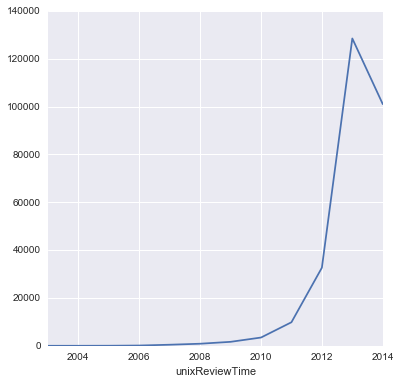

In [46]:
df.groupby([pd.Grouper(key='unixReviewTime',freq='A')])['reviewerID'].count().plot(figsize=(6,6))

### EXERCISE: Plot the number of reviews timeseries by month, year

In [ ]:
# Your code here

### EXERCISE: Draw two plots to compare average review rating per day of the week between 2013 and 2014

In [ ]:
# Your code here

TypeError: len() of unsized object

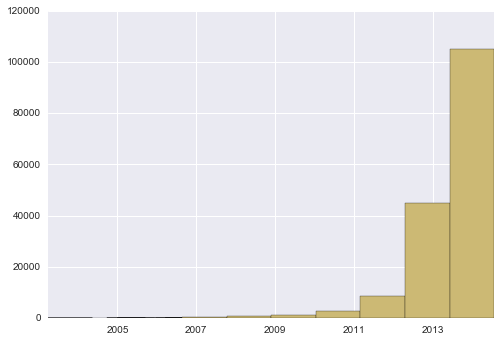

In [100]:
df.groupby('overall').unixReviewTime.hist()[2]

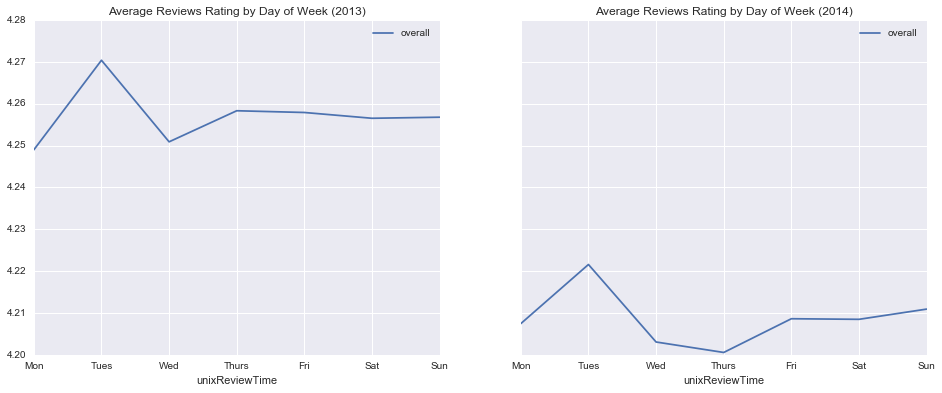

In [72]:
import matplotlib.pyplot as plt

by_weekday = df.groupby([df.unixReviewTime.dt.year,
                              df.unixReviewTime.dt.dayofweek]).mean()
by_weekday.columns.name = None  # remove label for plot

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
by_weekday.loc[2013].plot(title='Average Reviews Rating by Day of Week (2013)', ax=ax[0]);
by_weekday.loc[2014].plot(title='Average Reviews Rating by Day of Week (2014)', ax=ax[1]);
for axi in ax:
    axi.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

### EXERCISE: Draw two plots to compare number of  reviews per month between 2012 and 2013

In [92]:
by_month

unixReviewTime  unixReviewTime
2003            0                      2
2004            0                      6
2005            0                     27
                                   ...  
2012            0                  32654
2013            0                 128518
2014            0                 101071
Name: reviewerID, dtype: int64

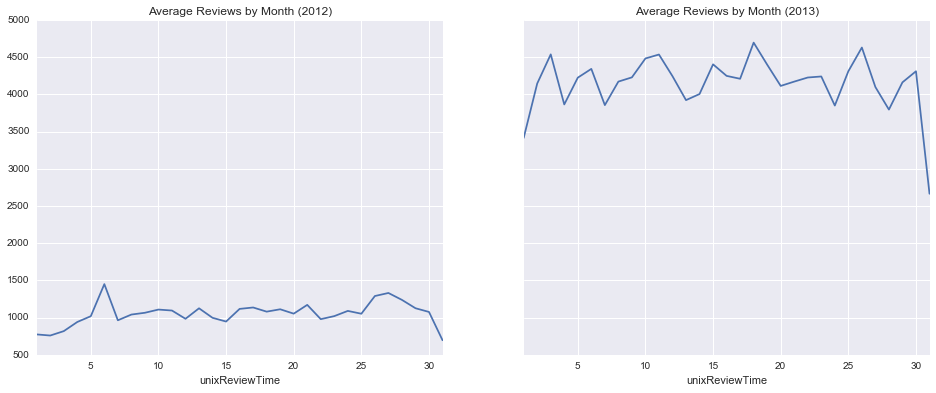

In [93]:
import matplotlib.pyplot as plt

by_month = df.groupby([df.unixReviewTime.dt.year,
                              df.unixReviewTime.dt.day])['reviewerID'].count()

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
by_month.loc[2012].plot(title='Average Reviews by Month (2012)', ax=ax[0]);
by_month.loc[2013].plot(title='Average Reviews by Month (2013)', ax=ax[1]);

In [86]:
for axi in ax:
    print(axi)

Axes(0.125,0.125;0.352273x0.775)
Axes(0.547727,0.125;0.352273x0.775)


In [82]:
by_month.loc[2012]

unixReviewTime
1     1706
2     1435
3     1356
      ... 
10    3526
11    4525
12    9442
Name: reviewerID, dtype: int64

## Summary

### Learning objectives:

- Reading and writing data
```
pd.DataFrame()
pd.read_json()
pd.read_csv()
df.to_csv()
df.to_json()
...
```

- Understading and formatting pandas data types
```
df.info()
df.to_datetime()
df.to_categoricals()
...
```

- Working with text data
```
.str accessor
.str.len()
...
```
    
- Working with timeseries data
```
.dt accessor
.str.dayofweek
...
```

- Indexing
```
df.loc[]
df.iloc[]
.isin()
```

- Grouping
```
df.groupby(grouper).agg('mean')
...
```